In [200]:
from __future__ import annotations
import networkx as nx
import matplotlib.pyplot as plt
from celluloid import Camera
from dataclasses import dataclass
from typing import Union, Self, Callable, List
from random import randint

In [201]:
GRAPH_SEED: int = 1
DRAWING_SEED: int = 1
DIRECTED_GRAPH: bool = False

In [202]:
class Graph:
    def __init__(self, g: Union[nx.Graph, None]=None) -> None:
        if g is None:
            self.g: nx.Graph = nx.Graph()
        else:
            self.g: nx.Graph = g

    @classmethod
    def create_example_graph(cls: type[Graph]) -> Graph:
        g = nx.erdos_renyi_graph(6, 0.5, seed=GRAPH_SEED, directed=DIRECTED_GRAPH)
        for (u, v) in g.edges():
            g.edges[u,v]['weight'] = randint(1,10)/10
        return cls(g)

    @dataclass
    class FunctionOutput:
        visited: list
        parents: dict
        
        def __repr__(self) -> str:
            return "".join([f"{parent} -> {node}\n" for node, parent in self.parents.items()])
    
    @staticmethod
    def bfs(g: nx.Graph, start: int, end: int) -> Graph.FunctionOutput:
        queue: list = [start]
        visited: list = [start]
        parents: dict = {}
        while queue:
            print(f"Queue: {queue}")
            print(f"Visited: {visited}")
            node: int = queue.pop(0)
            if node == end:
                return Graph.FunctionOutput(visited, parents)
            for neighbour in g.neighbors(node):
                if neighbour not in visited:
                    visited.append(neighbour)
                    parents[neighbour] = node
                    queue.append(neighbour)
        raise Exception("Path not found")

    @staticmethod
    def dfs(g: nx.Graph, start: int, end: int, visited: list=[], parents: dict={}) -> Graph.FunctionOutput:
        visited += [start]
        print(f"Visited: {visited}")
        print(f"Current node: {start}")
        if start == end:
            return Graph.FunctionOutput(visited, parents)
        else:
            for node in g.neighbors(start):
                if node not in visited:
                    parents[node] = start
                    return Graph.dfs(g, node, end, visited, parents)
        raise Exception("Path not found")
    
    def draw(self: Self, node_colors: Union[List[str], None]=None) -> None:
        node_colors = node_colors or ['white' for node in self.g.nodes()]
        elarge = [(u, v) for (u, v, d) in self.g.edges(data=True) if d["weight"] > 0.5]
        esmall = [(u, v) for (u, v, d) in self.g.edges(data=True) if d["weight"] <= 0.5]
        pos = nx.spring_layout(self.g, seed=DRAWING_SEED)
        nx.draw_networkx_nodes(self.g, pos, node_size=700, node_color=node_colors)
        nx.draw_networkx_edges(self.g, pos, edgelist=elarge, width=3)
        nx.draw_networkx_edges(
            self.g, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
        )
        nx.draw_networkx_labels(self.g, pos, font_size=20, font_family="sans-serif")
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels)
        ax = plt.gca()
        ax.margins(0.08)
        plt.axis("off")
        plt.tight_layout()
        
    def draw_function(self: Self, start: int, end: int, function_to_draw: Callable [[nx.Graph, int, int], Graph.FunctionOutput]) -> None:
            fig = plt.figure()
            camera = Camera(fig)
            self.plots = []
            function_ouput = function_to_draw(self.g, start, end)
            print(f"Path:\n{function_ouput}")
            tmp = []
            for i in function_ouput.visited:
                tmp.append(i)
                colors = ['r' if node in tmp else 'white' for node in self.g.nodes() ]
                #nx.draw(self.g, with_labels=True, node_color=colors, pos=nx.spring_layout(self.g, seed=DRAWING_SEED))
                self.draw(node_colors=colors)
                camera.snap()
            camera.animate().save(f'{function_to_draw.__name__}.gif', writer='imagemagick', fps=1)
    
    

In [203]:
graph = Graph.create_example_graph()

Queue: [0]
Visited: [0]
Queue: [1, 4, 5]
Visited: [0, 1, 4, 5]
Queue: [4, 5, 2]
Visited: [0, 1, 4, 5, 2]
Queue: [5, 2]
Visited: [0, 1, 4, 5, 2]
Queue: [2, 3]
Visited: [0, 1, 4, 5, 2, 3]
Queue: [3]
Visited: [0, 1, 4, 5, 2, 3]
Path:
0 -> 1
0 -> 4
0 -> 5
1 -> 2
5 -> 3



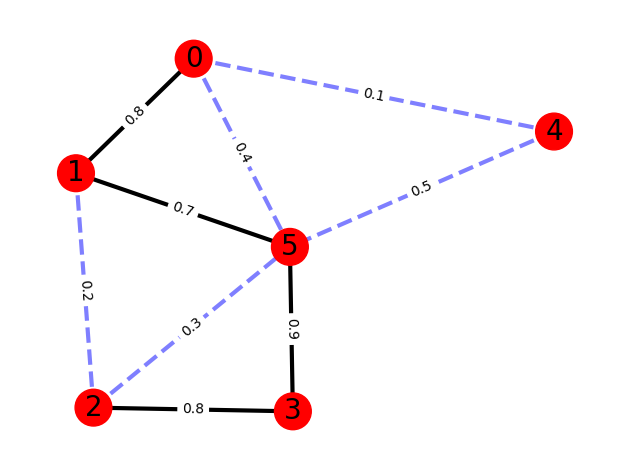

In [204]:
graph.draw_function(0, 3, Graph.bfs)

Visited: [0]
Current node: 0
Visited: [0, 1]
Current node: 1
Visited: [0, 1, 2]
Current node: 2
Visited: [0, 1, 2, 3]
Current node: 3
Path:
0 -> 1
1 -> 2
2 -> 3



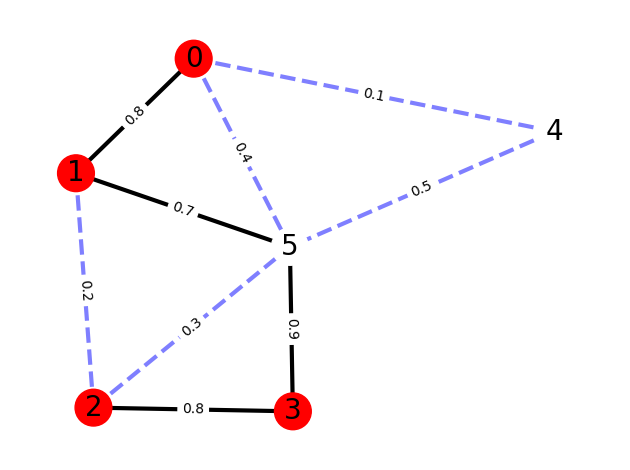

In [205]:
graph.draw_function(0, 3, Graph.dfs)

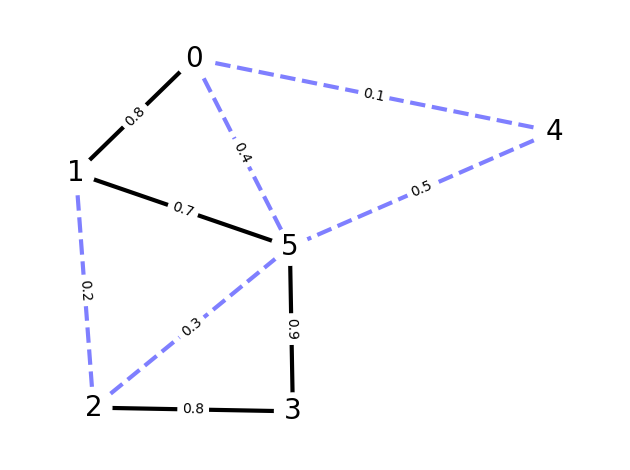

In [206]:
graph.draw()